In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics, model_selection, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from  IPython import display
import pathlib
import shutil
import tempfile
import sklearn.metrics

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [4]:
raw_dataset = pd.read_csv('path to datafile')
dataset_orig = raw_dataset.copy()
# dataset_orig.head()

In [5]:
# variable evol identifies the immune subtype (C2 or C3) of the sample
dataset=dataset_orig[['evol', 'Study','tumor_methyl_A_alt', 'tumor_methyl_B_alt', 'tumor_methyl_C_alt', 'normal_methyl_A_alt', 'normal_methyl_B_alt', 'normal_methyl_C_alt']]
df_study = pd.get_dummies(dataset['Study'])
# print(df_study)
dataset = pd.concat([dataset, df_study], axis=1)
dataset.head()

dataset.isna().sum()
dataset = dataset.dropna()
dataset.shape
dataset['evol']=dataset['evol'].astype('uint8')
dataset.Study.unique()

array(['KIRC', 'LUAD', 'UCEC', 'THCA', 'LUSC', 'PRAD', 'HNSC', 'COAD',
       'BLCA', 'LIHC', 'STAD', 'KIRP', 'CESC', 'SARC', 'PCPG', 'PAAD',
       'READ', 'ESCA', 'CHOL', 'BRCA'], dtype=object)

In [6]:
random_state = np.random.RandomState(0)
frac=0.6
ACC_df=dataset[dataset['Study']=='ACC']
ACC_train_dataset = ACC_df.sample(frac=frac, random_state=random_state)
ACC_test_dataset = ACC_df.drop(ACC_train_dataset.index)

BLCA_df=dataset[dataset['Study']=='BLCA']
BLCA_train_dataset = BLCA_df.sample(frac=frac, random_state=random_state)
BLCA_test_dataset = BLCA_df.drop(BLCA_train_dataset.index)

BRCA_df=dataset[dataset['Study']=='BRCA']
BRCA_train_dataset = BRCA_df.sample(frac=frac, random_state=random_state)
BRCA_test_dataset = BRCA_df.drop(BRCA_train_dataset.index)

CESC_df=dataset[dataset['Study']=='CESC']
CESC_train_dataset = CESC_df.sample(frac=frac, random_state=random_state)
CESC_test_dataset = CESC_df.drop(CESC_train_dataset.index)

CHOL_df=dataset[dataset['Study']=='CHOL']
CHOL_train_dataset = CHOL_df.sample(frac=frac, random_state=random_state)
CHOL_test_dataset = CHOL_df.drop(CHOL_train_dataset.index)

COAD_df=dataset[dataset['Study']=='COAD']
COAD_train_dataset = COAD_df.sample(frac=frac, random_state=random_state)
COAD_test_dataset = COAD_df.drop(COAD_train_dataset.index)

DLBC_df=dataset[dataset['Study']=='DLBC']
DLBC_train_dataset = DLBC_df.sample(frac=frac, random_state=random_state)
DLBC_test_dataset = DLBC_df.drop(DLBC_train_dataset.index)

ESCA_df=dataset[dataset['Study']=='ESCA']
ESCA_train_dataset = ESCA_df.sample(frac=frac, random_state=random_state)
ESCA_test_dataset = ESCA_df.drop(ESCA_train_dataset.index)

GBM_df=dataset[dataset['Study']=='GBM']
GBM_train_dataset = GBM_df.sample(frac=frac, random_state=random_state)
GBM_test_dataset = GBM_df.drop(GBM_train_dataset.index)

HNSC_df=dataset[dataset['Study']=='HNSC']
HNSC_train_dataset = HNSC_df.sample(frac=frac, random_state=random_state)
HNSC_test_dataset = HNSC_df.drop(HNSC_train_dataset.index)

KICH_df=dataset[dataset['Study']=='KICH']
KICH_train_dataset = KICH_df.sample(frac=frac, random_state=random_state)
KICH_test_dataset = KICH_df.drop(KICH_train_dataset.index)

KIRC_df=dataset[dataset['Study']=='KIRC']
KIRC_train_dataset = KIRC_df.sample(frac=frac, random_state=random_state)
KIRC_test_dataset = KIRC_df.drop(KIRC_train_dataset.index)

KIRP_df=dataset[dataset['Study']=='KIRP']
KIRP_train_dataset = KIRP_df.sample(frac=frac, random_state=random_state)
KIRP_test_dataset = KIRP_df.drop(KIRP_train_dataset.index)

LGG_df=dataset[dataset['Study']=='LGG']
LGG_train_dataset = LGG_df.sample(frac=frac, random_state=random_state)
LGG_test_dataset = LGG_df.drop(LGG_train_dataset.index)

LIHC_df=dataset[dataset['Study']=='LIHC']
LIHC_train_dataset = LIHC_df.sample(frac=frac, random_state=random_state)
LIHC_test_dataset = LIHC_df.drop(LIHC_train_dataset.index)

LUAD_df=dataset[dataset['Study']=='LUAD']
LUAD_train_dataset = LUAD_df.sample(frac=frac, random_state=random_state)
LUAD_test_dataset = LUAD_df.drop(LUAD_train_dataset.index)

LUSC_df=dataset[dataset['Study']=='LUSC']
LUSC_train_dataset = LUSC_df.sample(frac=frac, random_state=random_state)
LUSC_test_dataset = LUSC_df.drop(LUSC_train_dataset.index)

MESO_df=dataset[dataset['Study']=='MESO']
MESO_train_dataset = MESO_df.sample(frac=frac, random_state=random_state)
MESO_test_dataset = MESO_df.drop(MESO_train_dataset.index)

OV_df=dataset[dataset['Study']=='OV']
OV_train_dataset = OV_df.sample(frac=frac, random_state=random_state)
OV_test_dataset = OV_df.drop(OV_train_dataset.index)

PAAD_df=dataset[dataset['Study']=='PAAD']
PAAD_train_dataset = PAAD_df.sample(frac=frac, random_state=random_state)
PAAD_test_dataset = PAAD_df.drop(PAAD_train_dataset.index)

PCPG_df=dataset[dataset['Study']=='PCPG']
PCPG_train_dataset = PCPG_df.sample(frac=frac, random_state=random_state)
PCPG_test_dataset = PCPG_df.drop(PCPG_train_dataset.index)

PRAD_df=dataset[dataset['Study']=='PRAD']
PRAD_train_dataset = PRAD_df.sample(frac=frac, random_state=random_state)
PRAD_test_dataset = PRAD_df.drop(PRAD_train_dataset.index)


READ_df=dataset[dataset['Study']=='READ']
READ_train_dataset = READ_df.sample(frac=frac, random_state=random_state)
READ_test_dataset = READ_df.drop(READ_train_dataset.index)

SARC_df=dataset[dataset['Study']=='SARC']
SARC_train_dataset = SARC_df.sample(frac=frac, random_state=random_state)
SARC_test_dataset = SARC_df.drop(SARC_train_dataset.index)

SKCM_df=dataset[dataset['Study']=='SKCM']
SKCM_train_dataset = SKCM_df.sample(frac=frac, random_state=random_state)
SKCM_test_dataset = SKCM_df.drop(SKCM_train_dataset.index)

STAD_df=dataset[dataset['Study']=='STAD']
STAD_train_dataset = STAD_df.sample(frac=frac, random_state=random_state)
STAD_test_dataset = STAD_df.drop(STAD_train_dataset.index)

TGCT_df=dataset[dataset['Study']=='TGCT']
TGCT_train_dataset = TGCT_df.sample(frac=frac, random_state=random_state)
TGCT_test_dataset = TGCT_df.drop(TGCT_train_dataset.index)

THCA_df=dataset[dataset['Study']=='THCA']
THCA_train_dataset = THCA_df.sample(frac=frac, random_state=random_state)
THCA_test_dataset = THCA_df.drop(THCA_train_dataset.index)

THYM_df=dataset[dataset['Study']=='THYM']
THYM_train_dataset = THYM_df.sample(frac=frac, random_state=random_state)
THYM_test_dataset = THYM_df.drop(THYM_train_dataset.index)

UCEC_df=dataset[dataset['Study']=='UCEC']
UCEC_train_dataset = UCEC_df.sample(frac=frac, random_state=random_state)
UCEC_test_dataset = UCEC_df.drop(UCEC_train_dataset.index)

UCS_df=dataset[dataset['Study']=='UCS']
UCS_train_dataset = UCS_df.sample(frac=frac, random_state=random_state)
UCS_test_dataset = UCS_df.drop(UCS_train_dataset.index)

UVM_df=dataset[dataset['Study']=='UVM']
UVM_train_dataset = UVM_df.sample(frac=frac, random_state=random_state)
UVM_test_dataset = UVM_df.drop(UVM_train_dataset.index)

train_frames=[ACC_train_dataset,BLCA_train_dataset,BRCA_train_dataset,CESC_train_dataset,CHOL_train_dataset,COAD_train_dataset,DLBC_train_dataset,ESCA_train_dataset,GBM_train_dataset,HNSC_train_dataset,KICH_train_dataset,KIRC_train_dataset,KIRP_train_dataset,LGG_train_dataset,LIHC_train_dataset,LUAD_train_dataset,LUSC_train_dataset,MESO_train_dataset,OV_train_dataset,PAAD_train_dataset,PCPG_train_dataset,PRAD_train_dataset,READ_train_dataset,SARC_train_dataset,SKCM_train_dataset,STAD_train_dataset,TGCT_train_dataset,THCA_train_dataset,THYM_train_dataset,UCEC_train_dataset,UCS_train_dataset,UVM_train_dataset]
train_set=pd.concat(train_frames)
test_frames=[ACC_test_dataset,BLCA_test_dataset,BRCA_test_dataset,CESC_test_dataset,CHOL_test_dataset,COAD_test_dataset,DLBC_test_dataset,ESCA_test_dataset,GBM_test_dataset,HNSC_test_dataset,KICH_test_dataset,KIRC_test_dataset,KIRP_test_dataset,LGG_test_dataset,LIHC_test_dataset,LUAD_test_dataset,LUSC_test_dataset,MESO_test_dataset,OV_test_dataset,PAAD_test_dataset,PCPG_test_dataset,PRAD_test_dataset,READ_test_dataset,SARC_test_dataset,SKCM_test_dataset,STAD_test_dataset,TGCT_test_dataset,THCA_test_dataset,THYM_test_dataset,UCEC_test_dataset,UCS_test_dataset,UVM_test_dataset]
test_set=pd.concat(test_frames)


In [7]:
# exclude Study which is categorical
train_set.pop('Study')
test_set.pop('Study')
train_set.shape

(273, 36)

In [8]:
train_features = train_set.copy()
test_features = test_set.copy()

train_labels = train_features.pop('evol')
test_labels = test_features.pop('evol')

In [9]:
feature_names=list(train_features.columns)

In [10]:
X_train=pd.DataFrame.to_numpy(train_features)
y_train=pd.Series.to_numpy(train_labels)

X_test=pd.DataFrame.to_numpy(test_features)
y_test=pd.Series.to_numpy(test_labels)

In [11]:
clf = LogisticRegression(solver="liblinear", random_state=0)
clf.fit(X_train, y_train).score(X_test, y_test)

0.9175824175824175

In [12]:
clf = LogisticRegression(solver="liblinear", random_state=0)
pred=clf.fit(X_train, y_train).predict_proba(X_test)

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
roc_auc = auc(fpr, tpr)

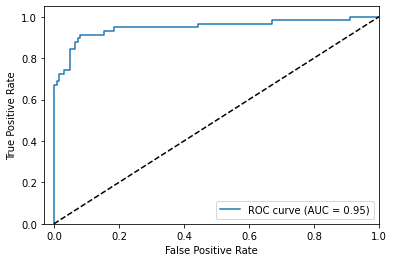

In [14]:
fig=plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# fig.savefig('evol.png')